In [3]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import missingno as mno

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
# Loading the dataframe using Pandas
df = pd.read_csv("adult.csv")

In [5]:
# Checking first 5 records of the DataFrame
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# Checking the basic info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Checking for the Null-Values.
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
# Checking the Basic Description of the DataFrame
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
# In the dataFrame null-values are represented with a "?" mark so we can convert them into numpy.nan values.
df.replace("?",np.nan,inplace=True)

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
# Let's Separate the Columns with Null-values.
null_cols = [column for column in df.columns if df[column].isnull().sum() > 0]

In [12]:
# checking the columns
null_cols

['workclass', 'occupation', 'native-country']

In [13]:
# Observing the columns with null values
df[null_cols]

,workclass,occupation,native-country
0,Private,Machine-op-inspct,United-States
1,Private,Farming-fishing,United-States
2,Local-gov,Protective-serv,United-States
3,Private,Machine-op-inspct,United-States
4,NaN,NaN,United-States
...,...,...,...
48837,Private,Tech-support,United-States
48838,Private,Machine-op-inspct,United-States
48839,Private,Adm-clerical,United-States
48840,Private,Adm-clerical,United-States


In [14]:
# Checking for the Datatypes of the null-columns
df[null_cols].dtypes

workclass         object
occupation        object
native-country    object
dtype: object

In [15]:
# Checking for the number of unique values in this columns
df[null_cols].nunique()

workclass          8
occupation        14
native-country    41
dtype: int64

In [16]:
# Adding someweightage to the columns where they had null_values
imputed_columns = []
for column in null_cols:
    df[column+"_null_weight"] = df[column]
    imputed_columns.append(column+"_null_weight")
    df[column+"_null_weight"] = np.where(df[column].isnull(),1,0)

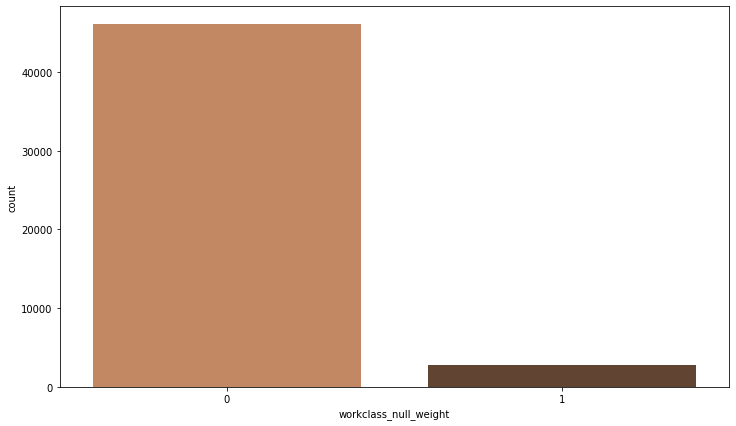

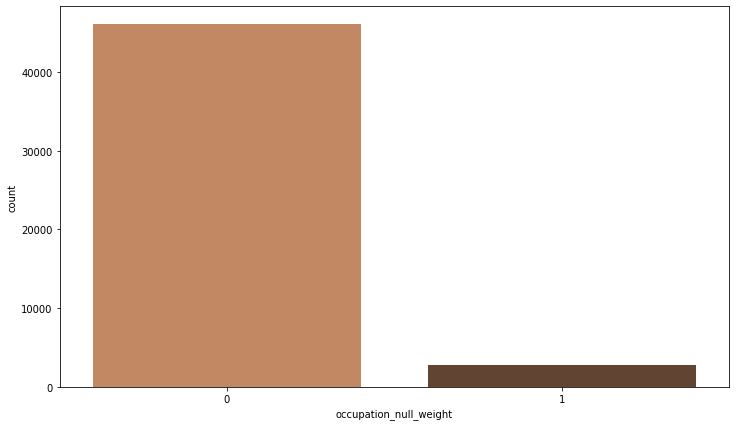

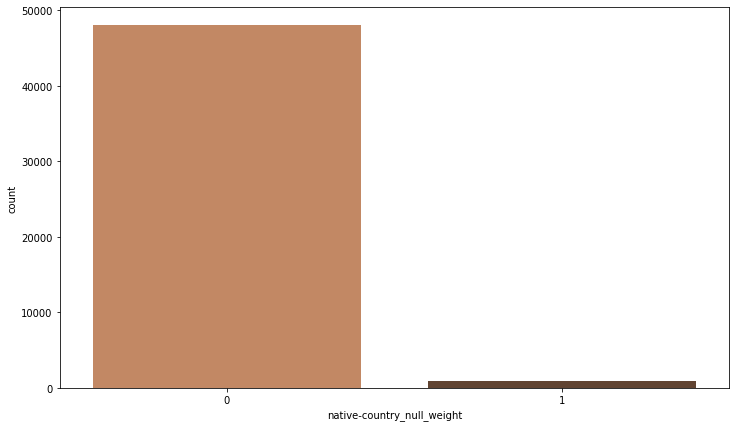

In [17]:
for column in imputed_columns:
    plt.figure(figsize=(12,7))
    sns.countplot(df[column],palette="copper_r")
    plt.show()

_All the Columns are Categorical Columns and all are having Discrete Values , So we can fill them with mode._

In [18]:
# Filling the Null-columns with mode
for column in null_cols:
    work_mode = df[column].mode()[0]
    df[column].fillna(work_mode,inplace=True)

In [19]:
df[null_cols].isnull().sum()

workclass         0
occupation        0
native-country    0
dtype: int64

In [20]:
df.isnull().sum()

age                           0
workclass                     0
fnlwgt                        0
education                     0
educational-num               0
marital-status                0
occupation                    0
relationship                  0
race                          0
gender                        0
capital-gain                  0
capital-loss                  0
hours-per-week                0
native-country                0
income                        0
workclass_null_weight         0
occupation_null_weight        0
native-country_null_weight    0
dtype: int64

_Now we have successfully imputed the Missing values with most_frequent value as well as created a new column for giving Weightage for the missing value._

In [21]:
# First encode the target column with labels .
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [22]:
df['income'].dtype

dtype('O')

In [23]:
# We can simply map them with numerical label (0,1).
# More than 50k = 1, less than or equal to 50k = 0.
df["income"] = df['income'].map({"<=50K":0,">50K":1})

In [24]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

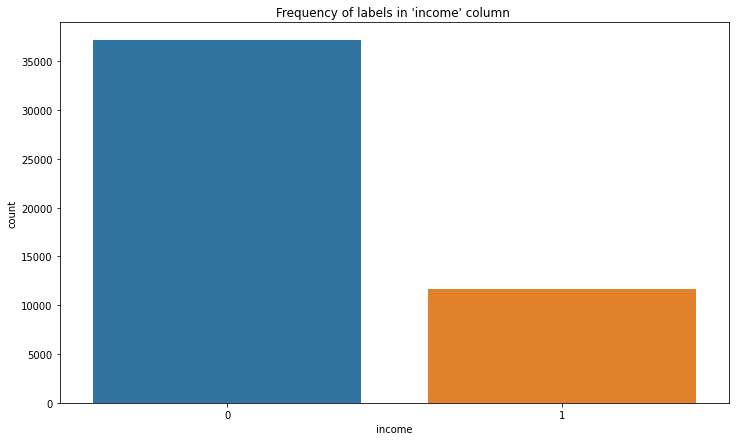

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(df['income'])
plt.title("Frequency of labels in 'income' column ")
plt.show()

In [26]:
# Let's separate all the numerical columns from the dataset. 
num_cols = [column for column in df.columns if column not in df.select_dtypes(include="O")]

In [27]:
# Checking the data types for the confirmation
df[num_cols].dtypes

age                           int64
fnlwgt                        int64
educational-num               int64
capital-gain                  int64
capital-loss                  int64
hours-per-week                int64
income                        int64
workclass_null_weight         int64
occupation_null_weight        int64
native-country_null_weight    int64
dtype: object

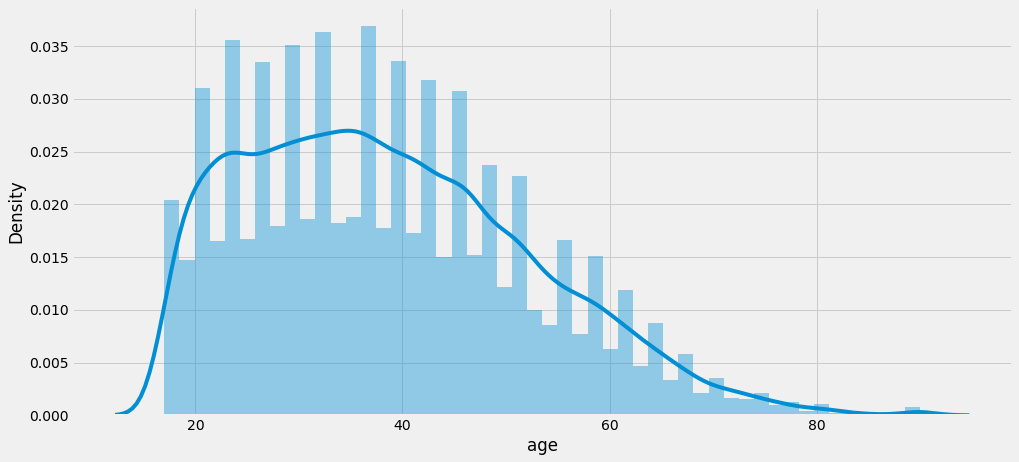

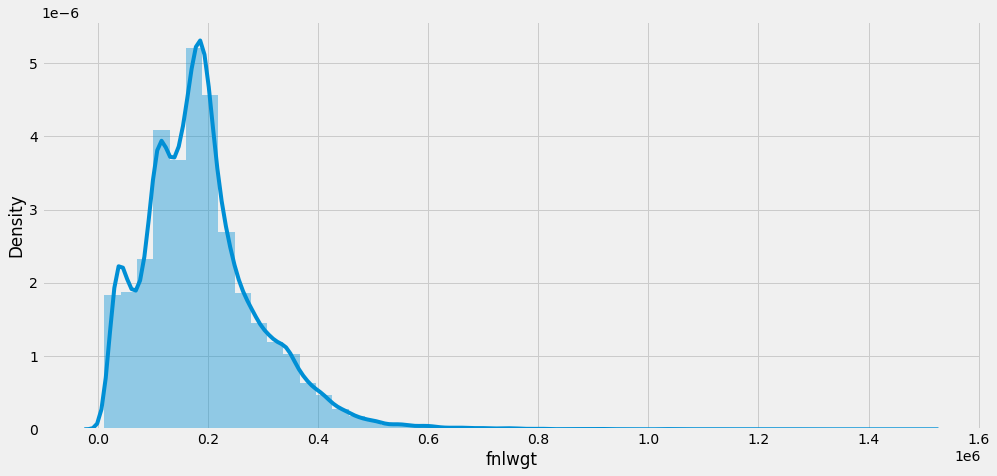

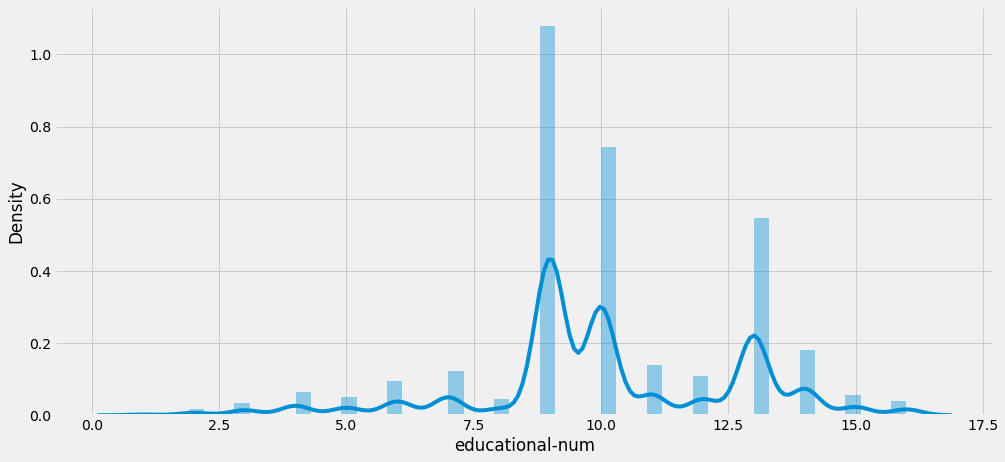

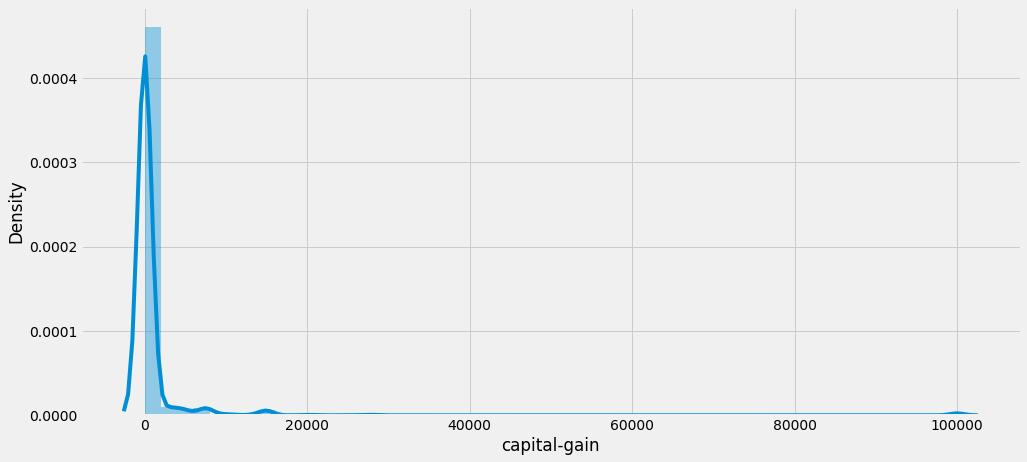

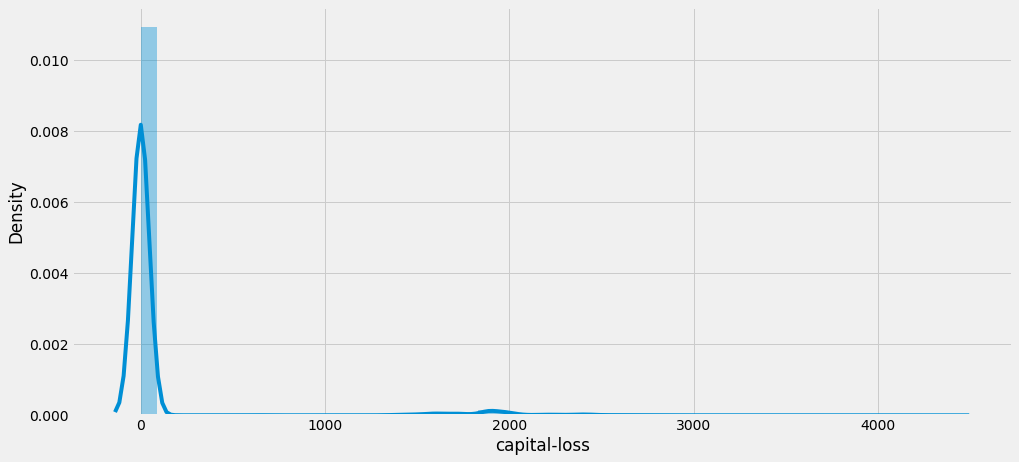

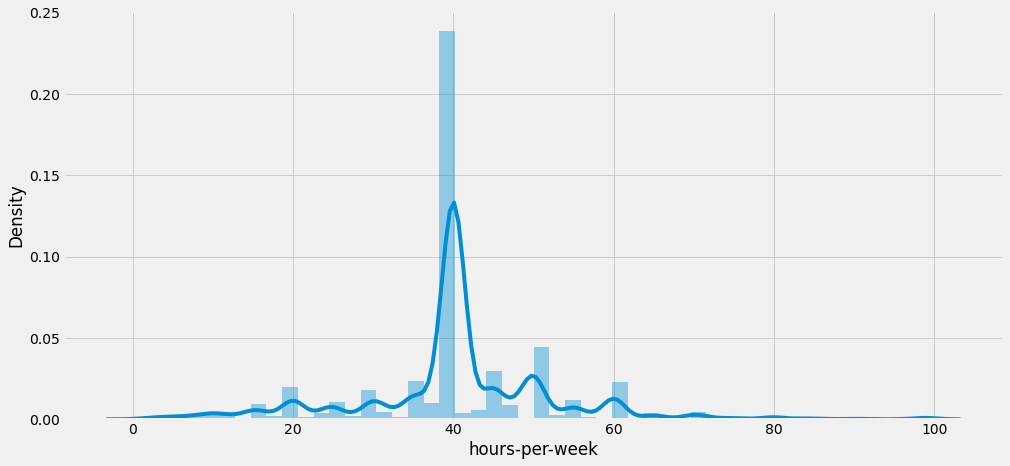

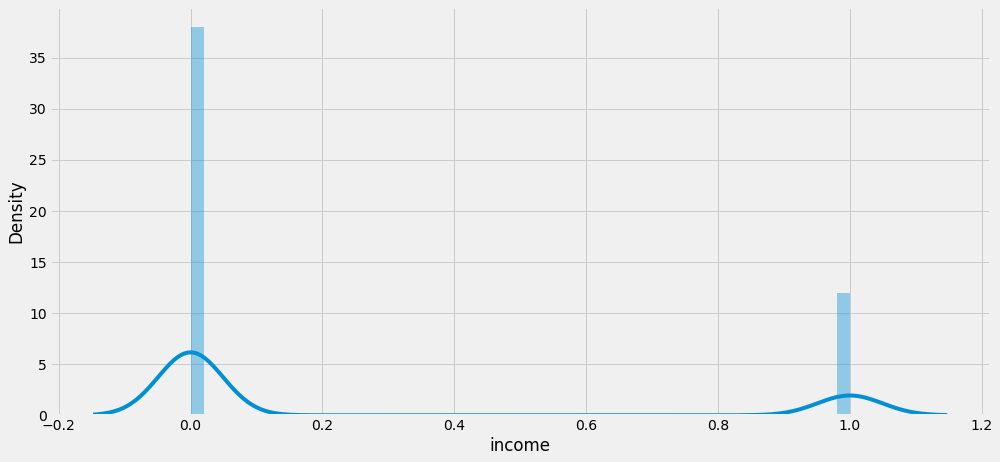

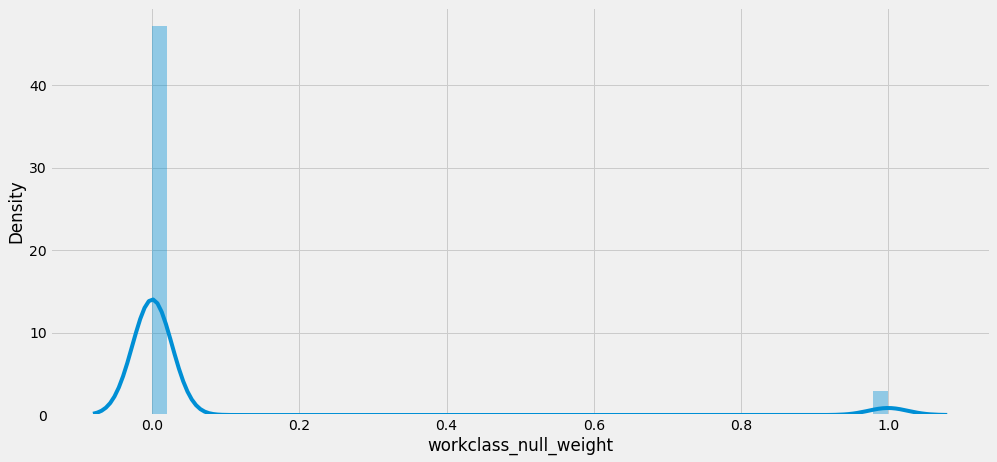

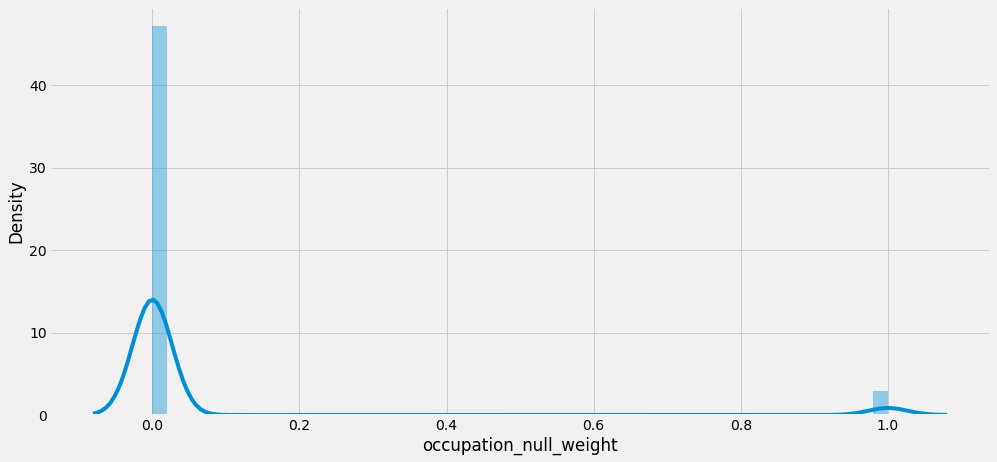

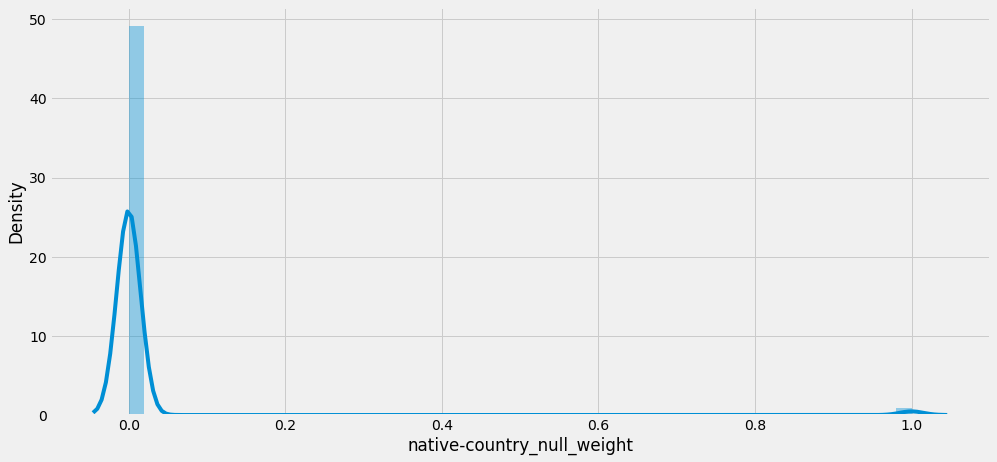

In [28]:
plt.style.use("fivethirtyeight")
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.show()

In [29]:
marker = dict(markerfacecolor='yellow',markeredgecolor='red',markersize=15,marker='o')

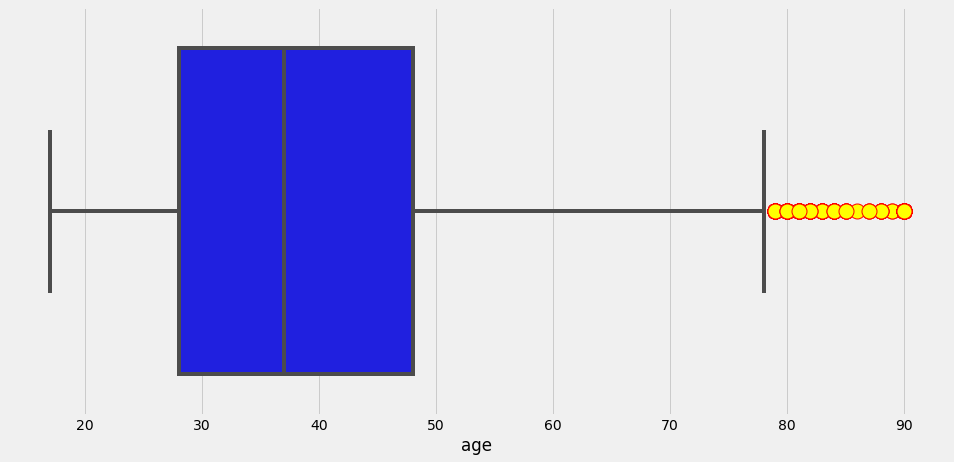

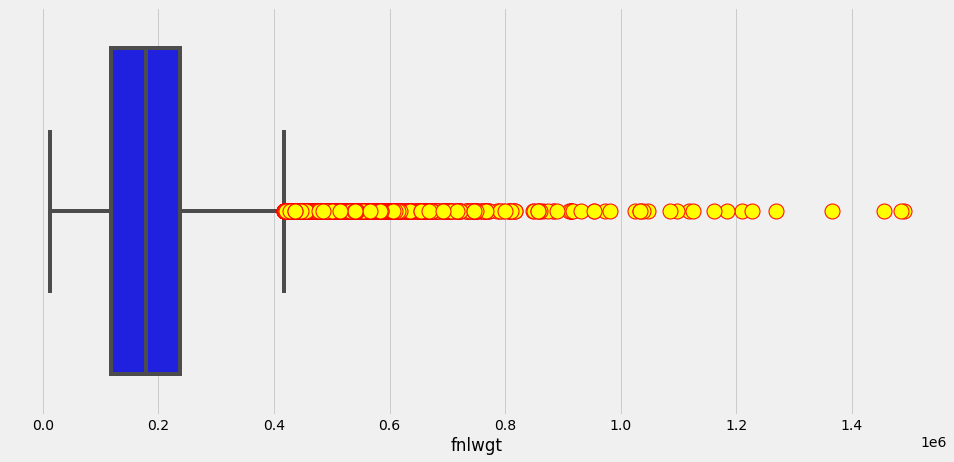

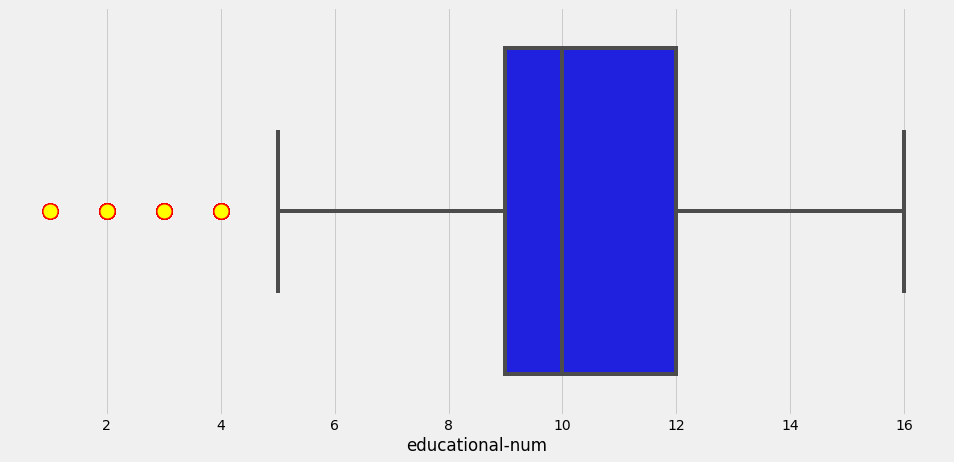

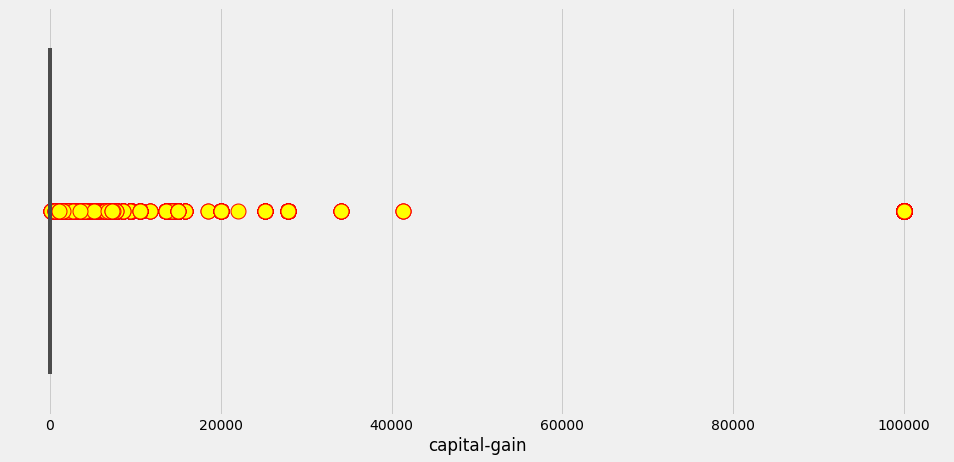

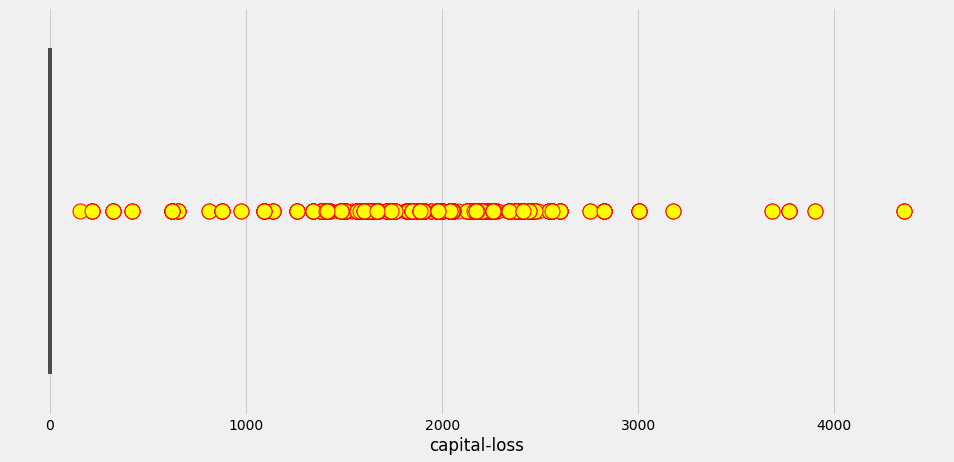

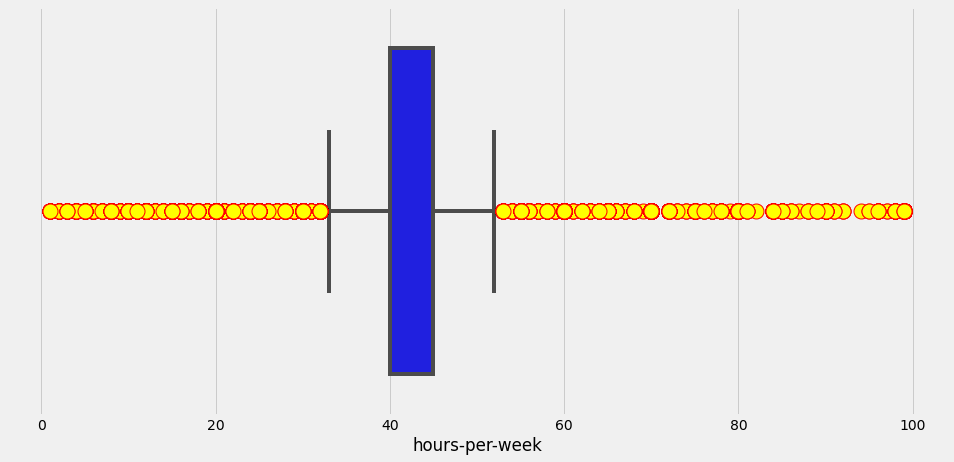

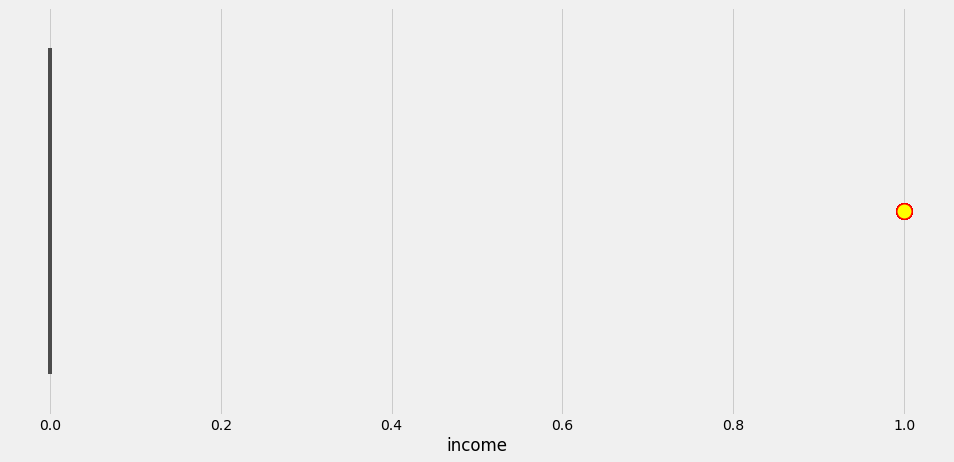

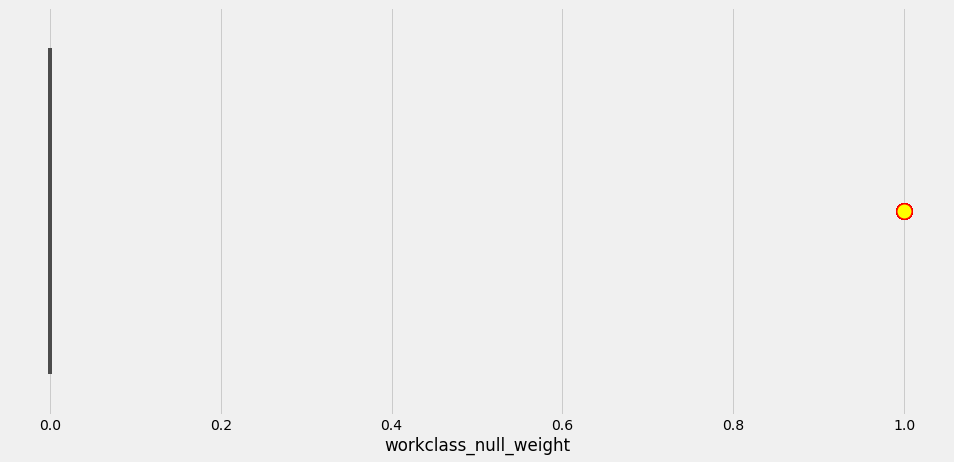

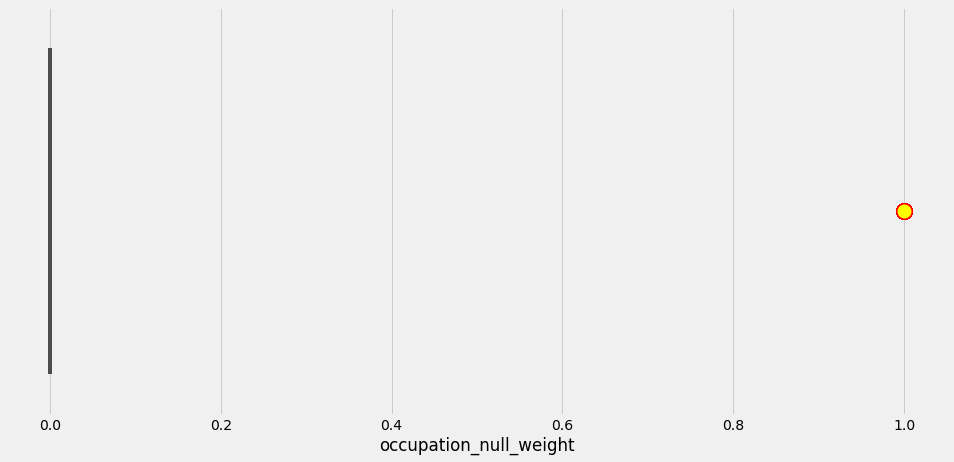

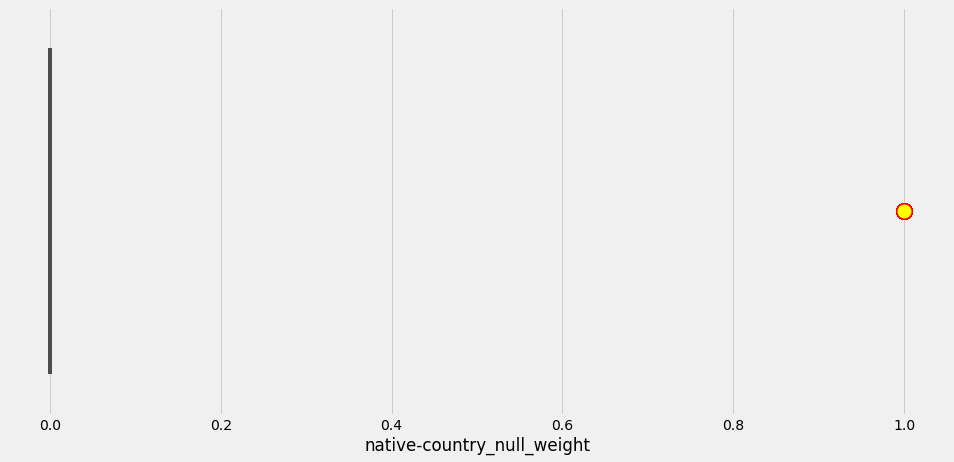

In [30]:
plt.style.use("fivethirtyeight")
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(df[col],color='blue',flierprops = marker)
    plt.show()

In [31]:
# Finding the Discrete columns from the numerical Columns
num_discrete_cols = [col for col in num_cols if df[col].nunique() < 25]

In [32]:
num_discrete_cols

['educational-num',
 'income',
 'workclass_null_weight',
 'occupation_null_weight',
 'native-country_null_weight']

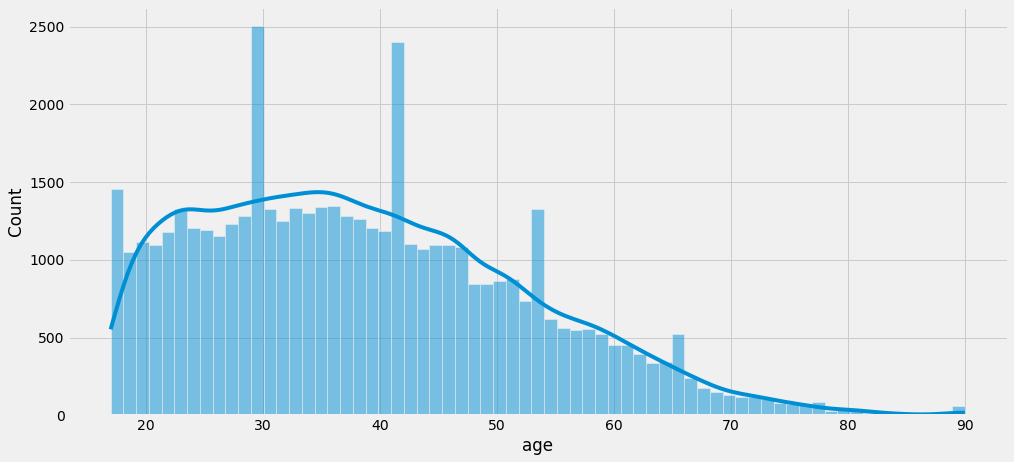

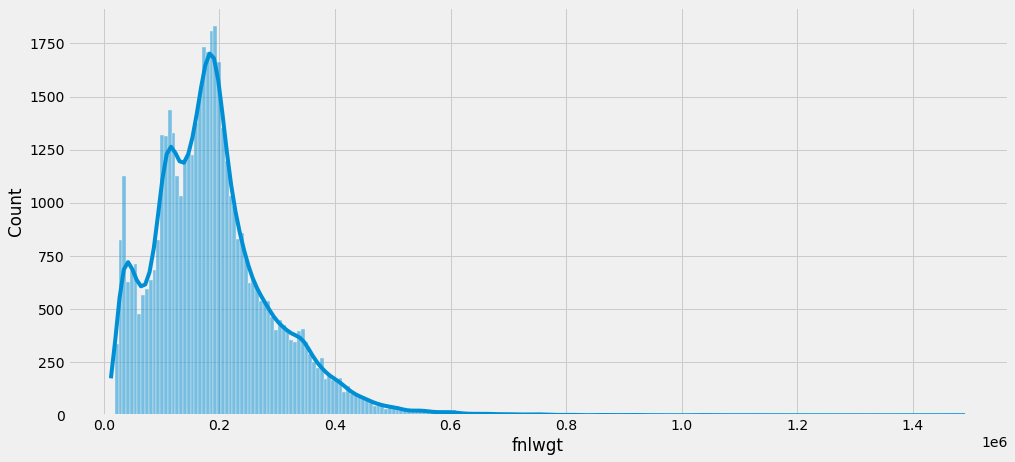

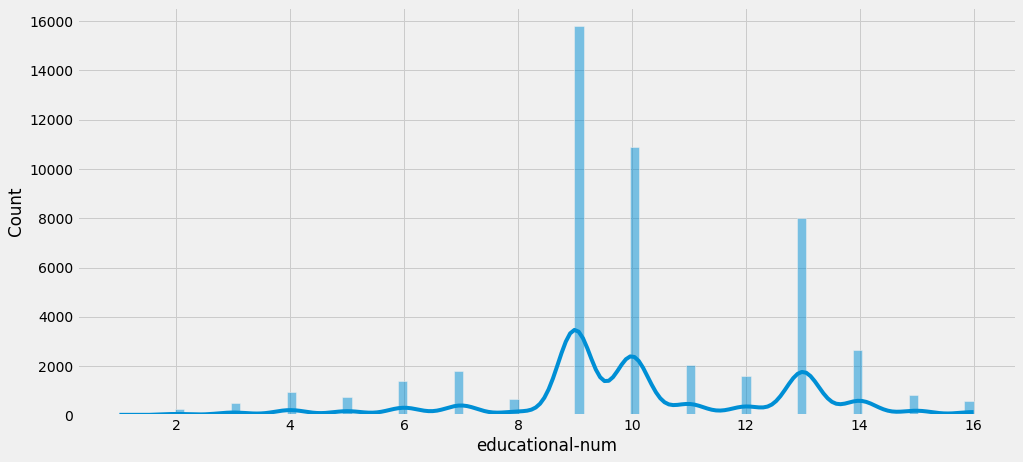

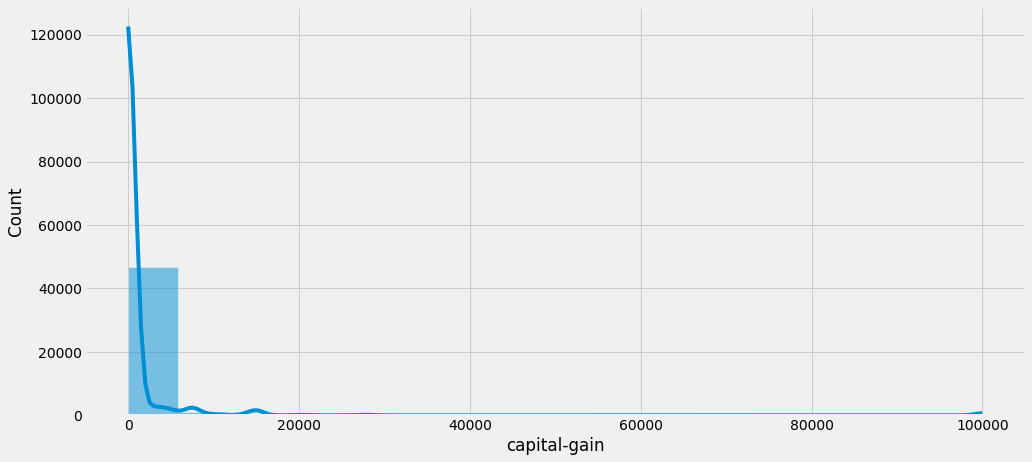

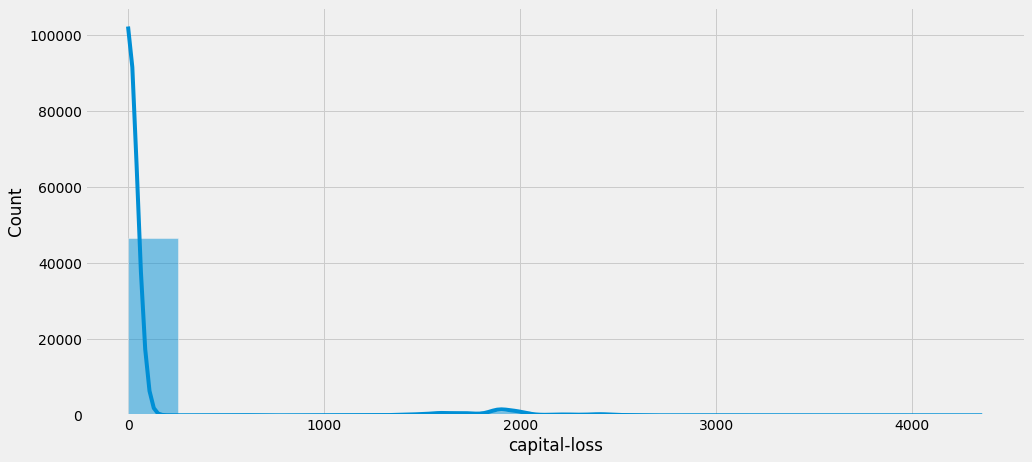

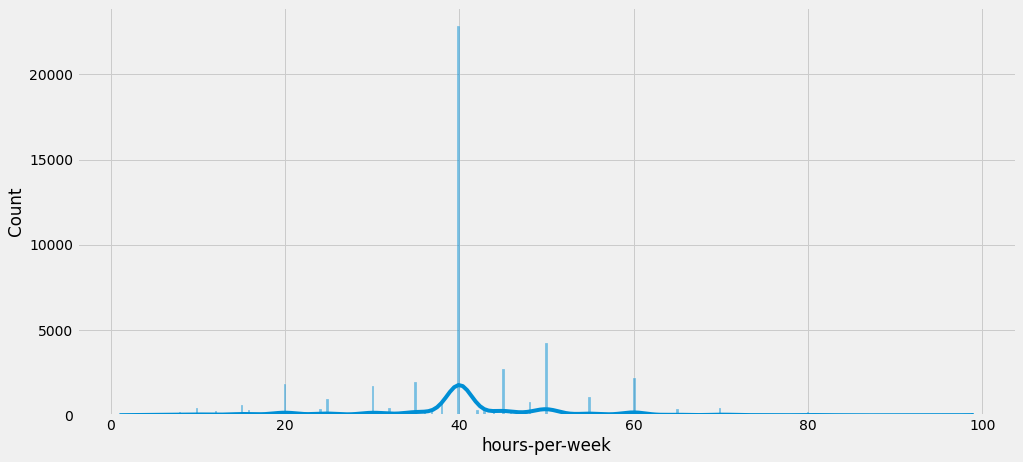

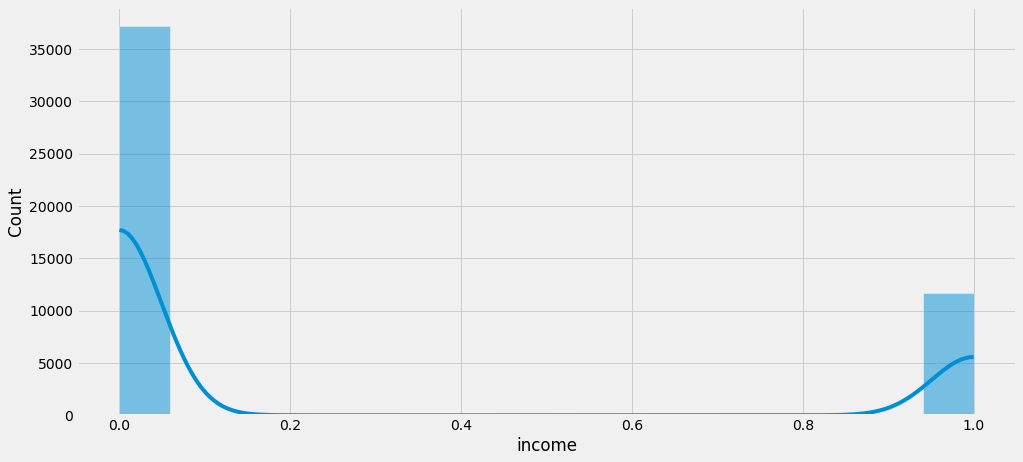

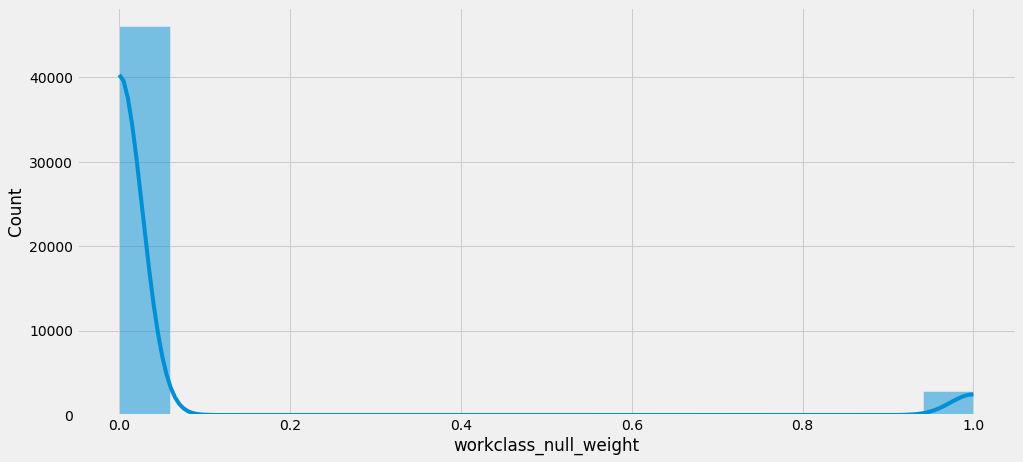

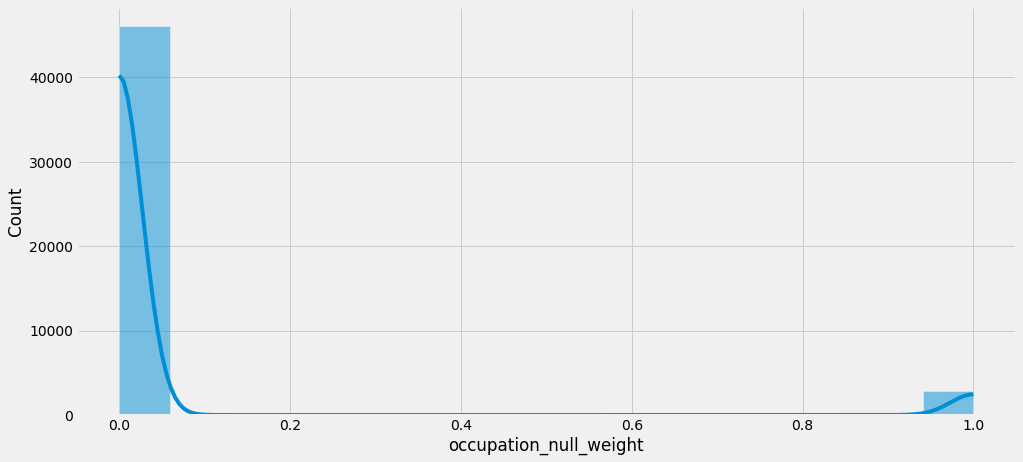

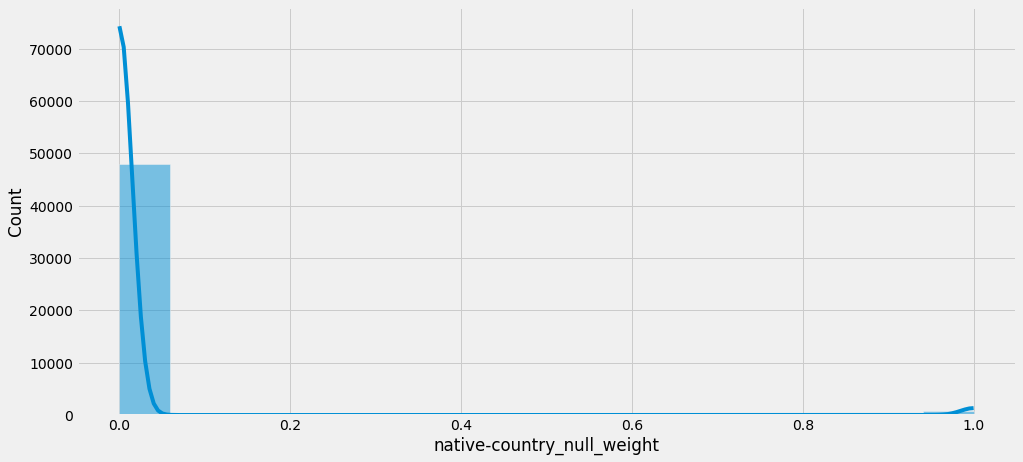

In [33]:
# Plotting Histograms for num_cols 
for col in num_cols:
    plt.figure(figsize=(15,7))
    sns.histplot(df[col],kde=True)
    plt.show()

In [34]:
# Separating the categorical columns
cat_cols = [column for column in df.columns if column not in  num_discrete_cols]
cat_cols = [column for column in cat_cols if column not in  num_cols]

In [35]:
# Checking the Datatype for confirmation
df[cat_cols].dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
native-country    object
dtype: object

In [36]:
df[num_discrete_cols].nunique()

educational-num               16
income                         2
workclass_null_weight          2
occupation_null_weight         2
native-country_null_weight     2
dtype: int64

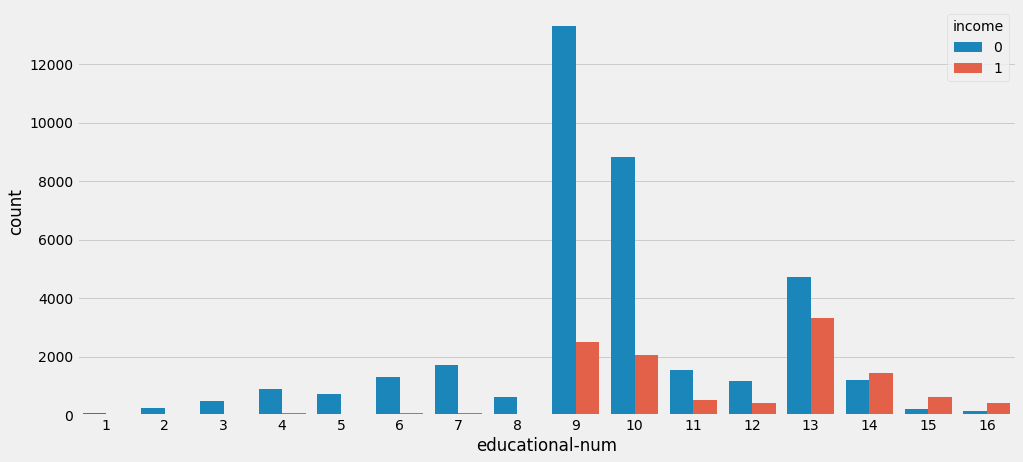

In [37]:
# We are only looking at "educational-num" column , because remains columns are we created for the null-weightage
plt.figure(figsize=(15,7))
sns.countplot(df['educational-num'],hue=df['income'])
plt.show()

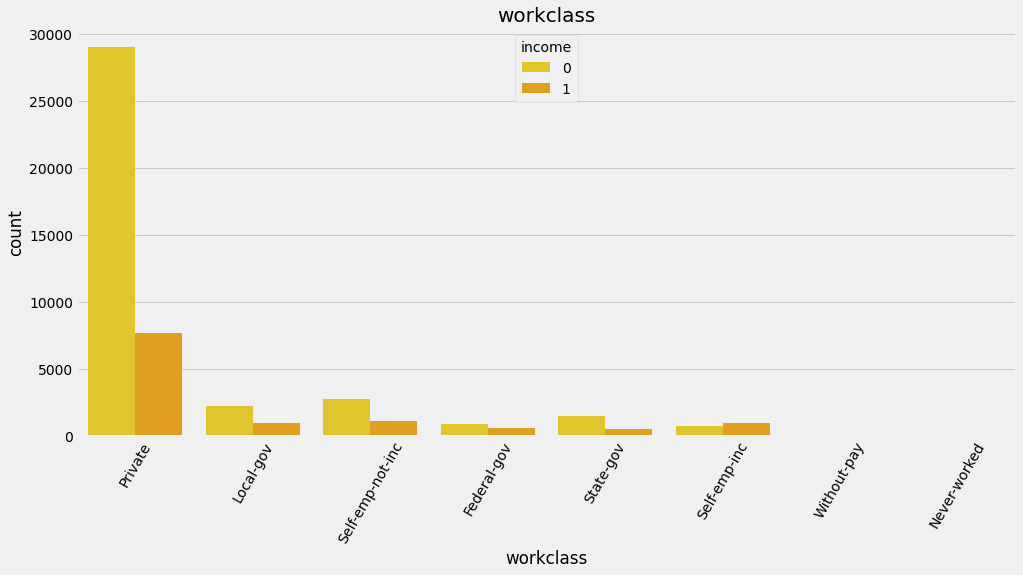

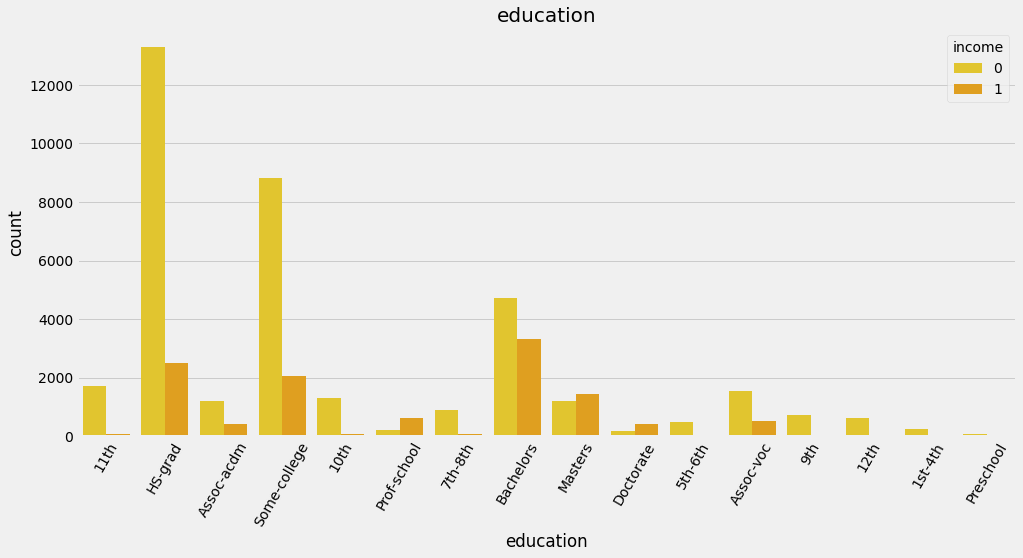

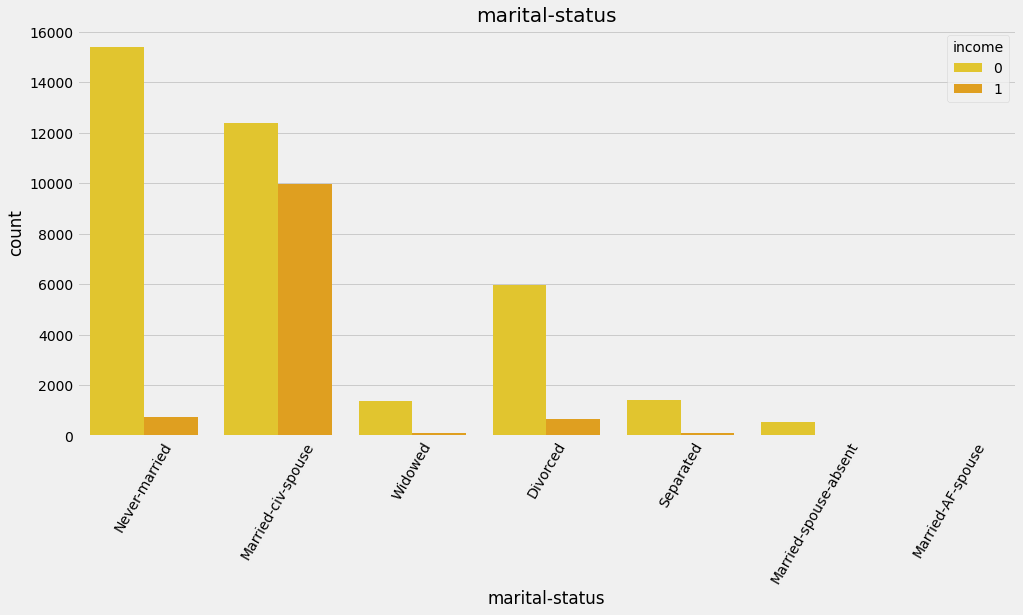

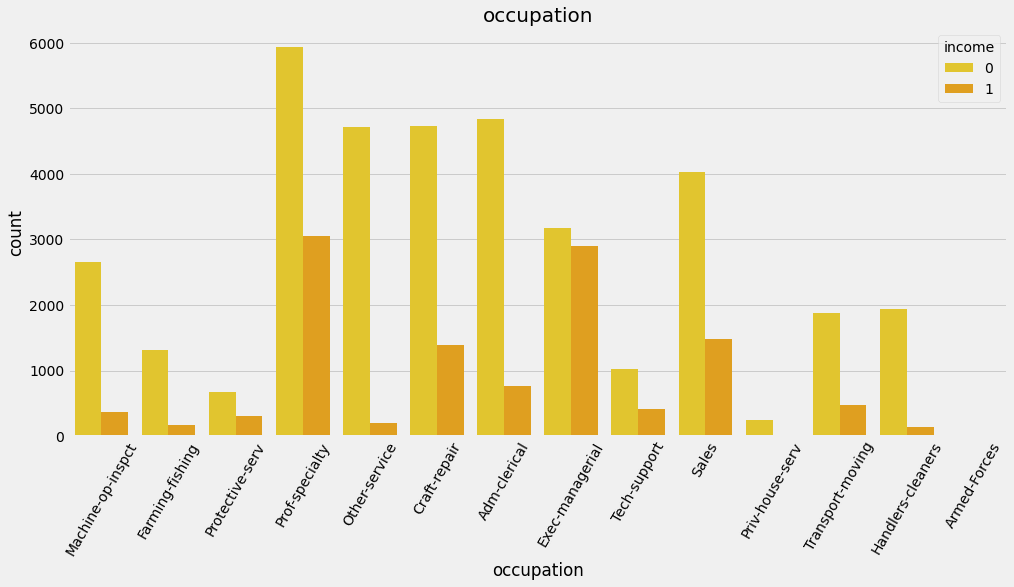

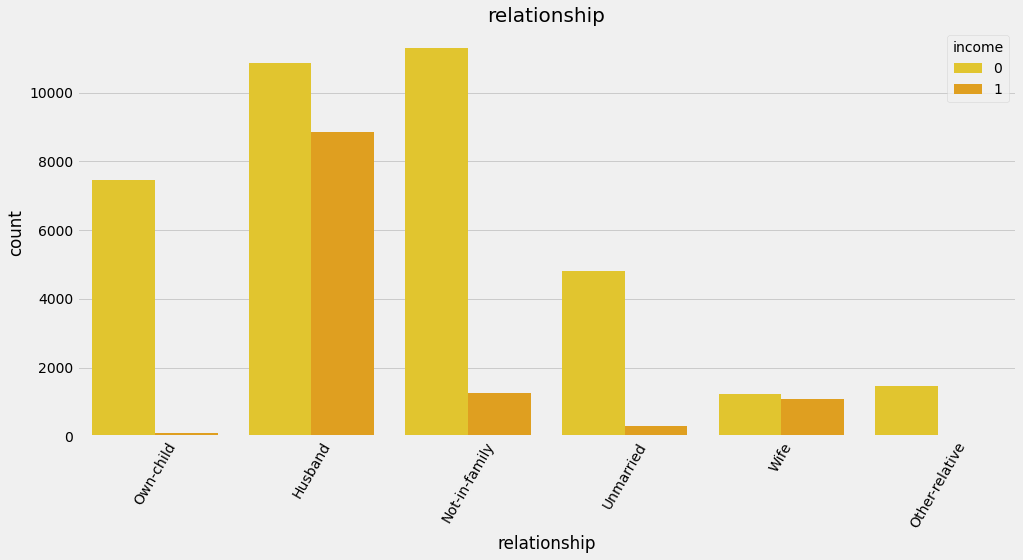

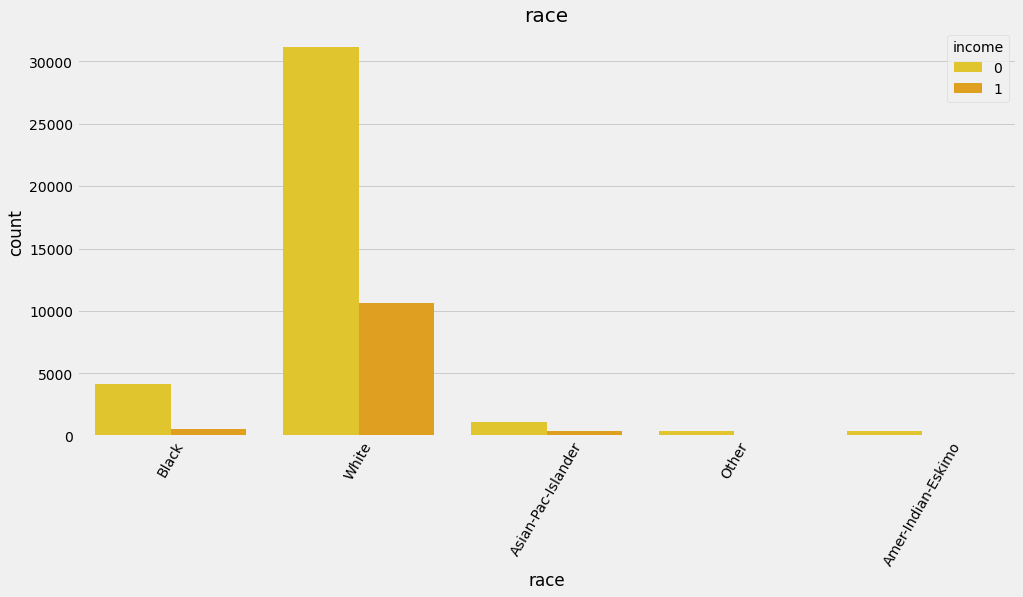

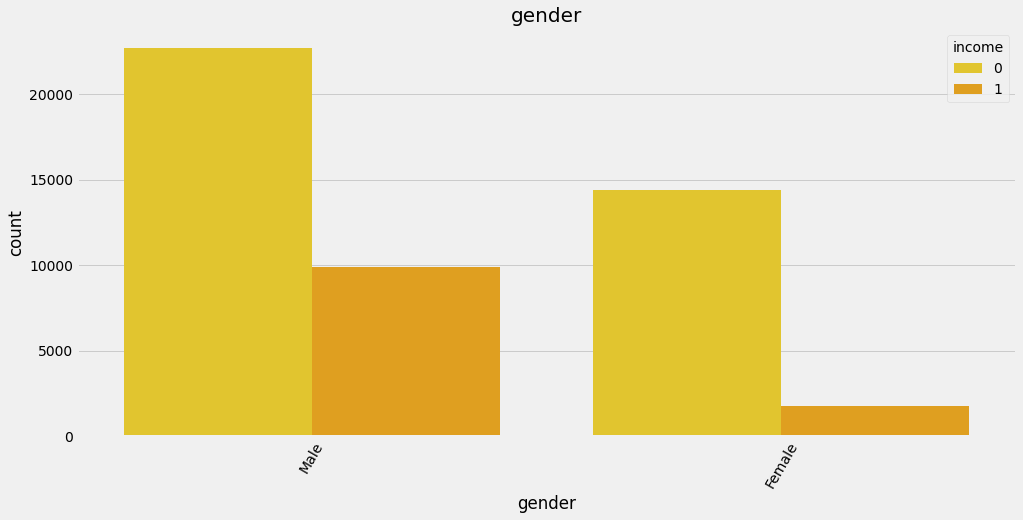

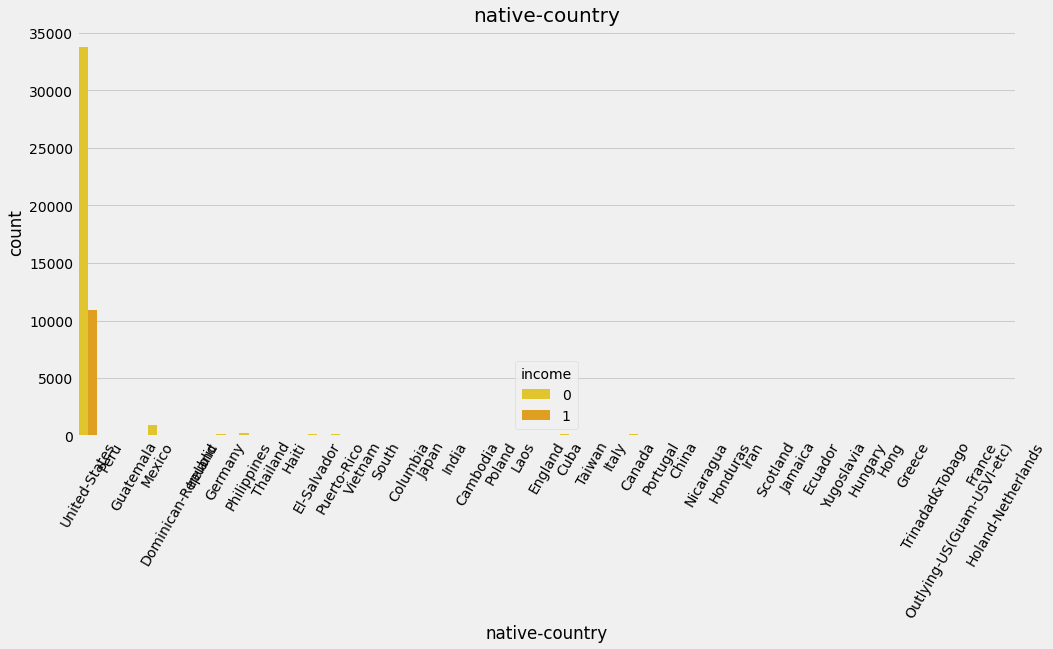

In [38]:
# Looking for the Relation with Categorical columns and Income
for column in cat_cols:
    plt.figure(figsize=(15,7))
    sns.countplot(df[column],hue=df['income'],palette="Wistia")
    plt.xticks(rotation = 60)
    plt.title(column,fontsize=20)
    plt.show()

In [39]:
df[cat_cols]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [40]:
# Encoding the Categorical Columns wrt to their effectness on the Target column
# Target Guided Encoding
category_dicts = []
for col in cat_cols:
    labels = df.groupby(col)['income'].mean().sort_values().index
    col_dict = {k:i for i , k in enumerate(labels,0)}
    df[col] = df[col].map(col_dict)

In [41]:
# Making a dummy dataframe to onehot encode all the Categorical Columns
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [42]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_null_weight,occupation_null_weight,native-country_null_weight,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_1,occupation_2,...,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,25,226802,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,0,40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,160323,10,7688,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,103497,10,0,0,30,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h>Removing Outliers for the Numerical columns</h>

In [43]:
# Removing Catpital-Gain and Capital-Loss column
num_cols = [column for column in num_cols if column not in ['capital-loss','capital-gain']]
# There are N number of Outliers in the Numerical Continuous Columns
df.shape

(48842, 101)

In [44]:
def removing_outliers(df,columns):
    for col in columns:
        print(col)
        iqr = (np.percentile(df[col],75) - np.percentile(df[col],25))
        print(iqr)
        lower_boundary = (np.percentile(df[col],25) - (1.5 * iqr))
        print(lower_boundary)
        upper_boundary = (np.percentile(df[col],75) + (1.5 * iqr))
        print(upper_boundary)
        df = df[(df[col] <= upper_boundary) & (df[col] >= lower_boundary)]
    return df

In [45]:
data = df.copy()
new_data = removing_outliers(data,num_cols)

age
20.0
-2.0
78.0
fnlwgt
120205.0
-62701.5
418118.5
educational-num
3.0
4.5
16.5
hours-per-week
5.0
32.5
52.5
income
1.0
-1.5
2.5
workclass_null_weight
0.0
0.0
0.0
occupation_null_weight
0.0
0.0
0.0
native-country_null_weight
0.0
0.0
0.0


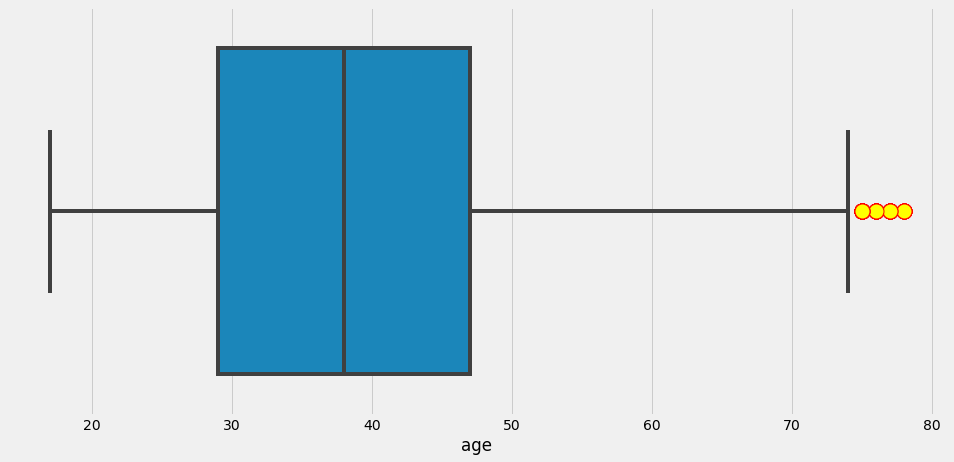

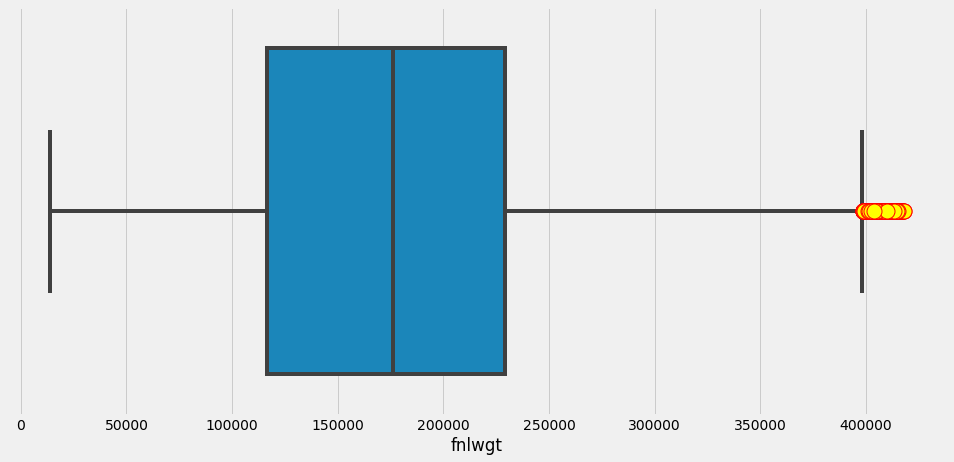

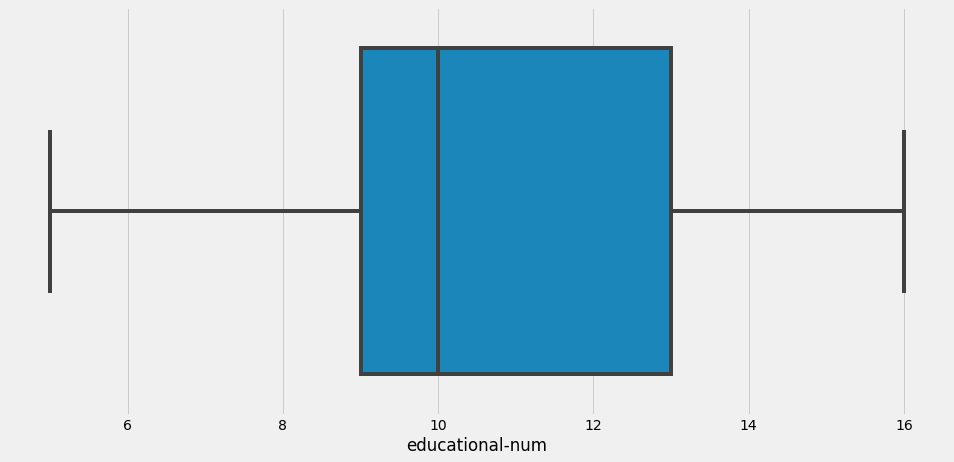

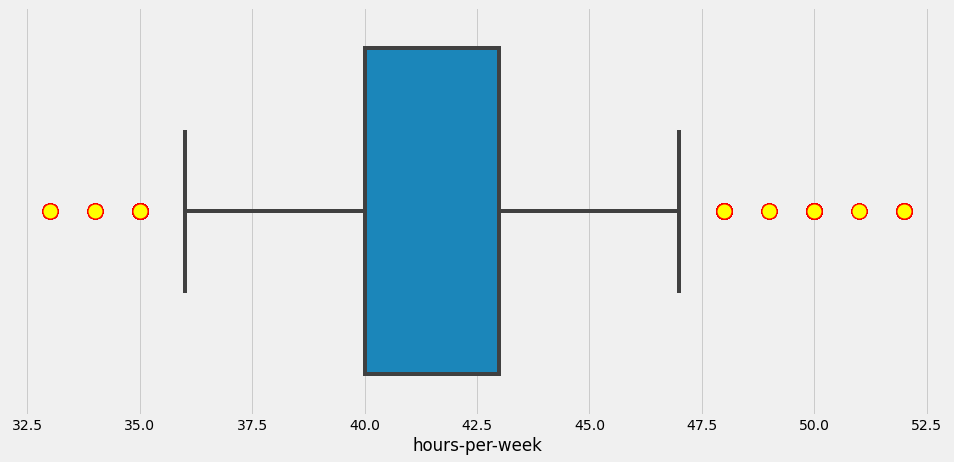

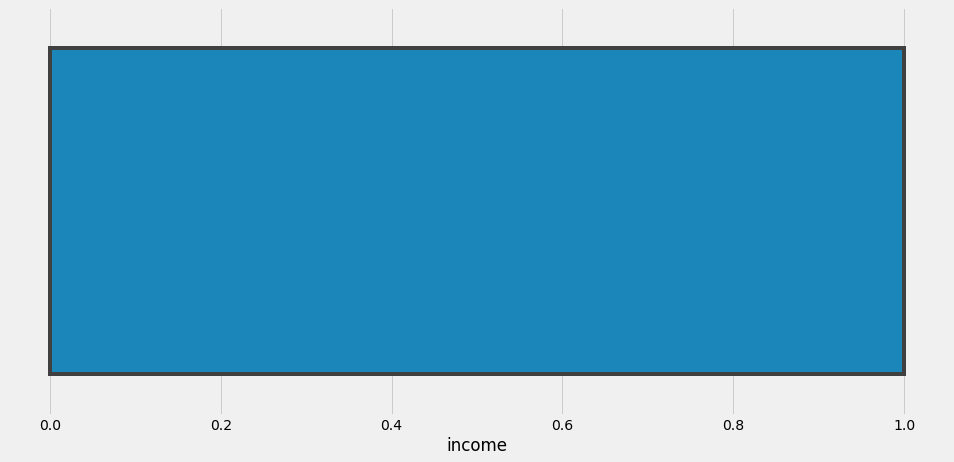

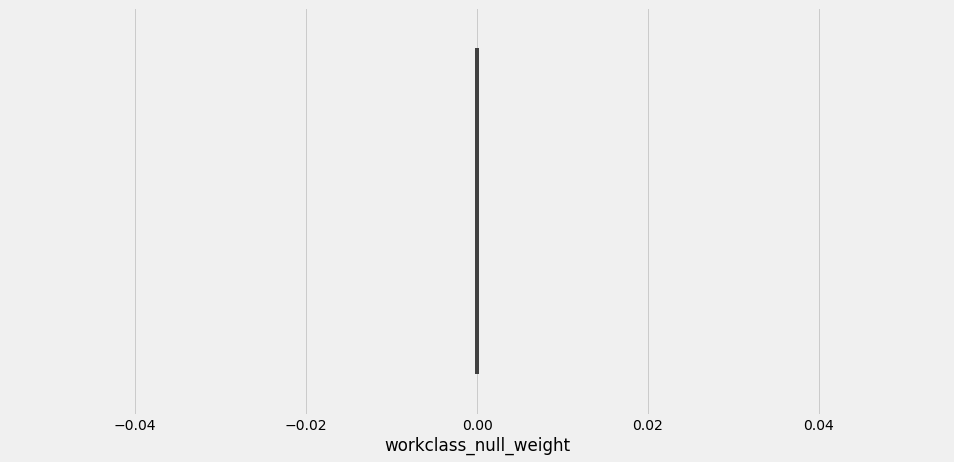

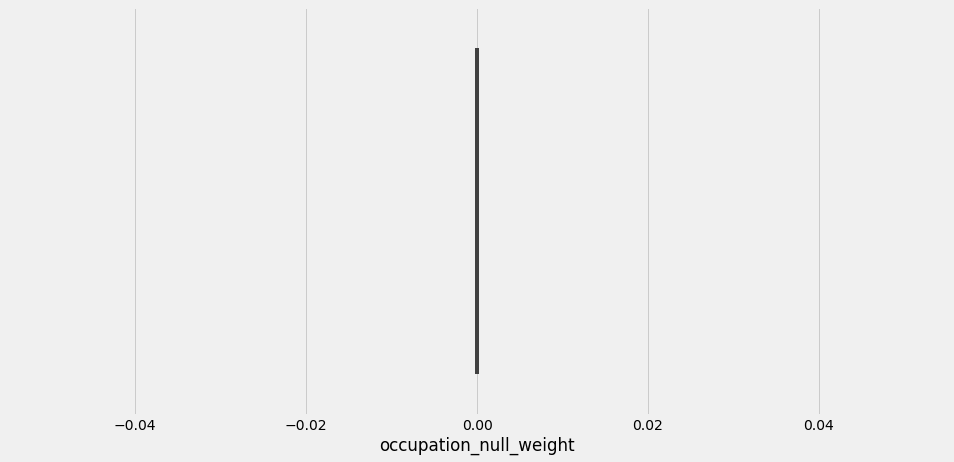

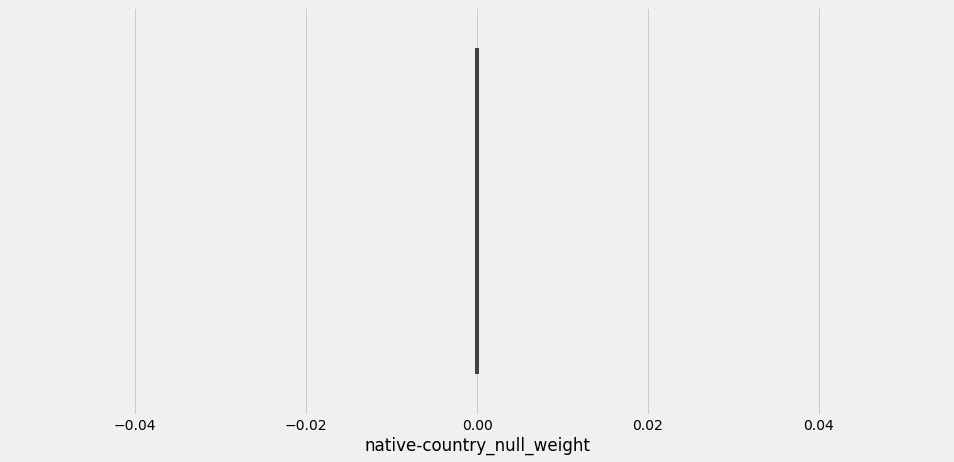

In [46]:
for column in num_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(new_data[column],flierprops = marker)
    plt.show()

In [47]:
df = new_data.copy()
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_null_weight,occupation_null_weight,native-country_null_weight,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_1,occupation_2,...,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,25,226802,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,0,40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,160323,10,7688,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,24,369667,10,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Check for the Dataset Balance
df['income'].value_counts()

0    22816
1     8343
Name: income, dtype: int64

In [49]:
df.shape

(31159, 101)

In [50]:
print(f"Class 0 Ratio {(df['income'].value_counts()[0] / df.shape[0]) * 100}")

Class 0 Ratio 73.22442953881703


In [51]:
print(f"Class 1 Ratio {(df['income'].value_counts()[1] / df.shape[0]) * 100}")

Class 1 Ratio 26.775570461182962


In [52]:
X = df.drop("income",axis=1)
y = df['income']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmode_auc = accuracy_score(y_test,preds)
print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6603  281]
 [1785  679]]
******************************
0.7789901583226359
******************************
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6884
           1       0.71      0.28      0.40      2464

    accuracy                           0.78      9348
   macro avg       0.75      0.62      0.63      9348
weighted avg       0.77      0.78      0.74      9348

******************************
CPU times: user 543 ms, sys: 235 ms, total: 778 ms
Wall time: 434 ms


In [55]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6200  684]
 [1678  786]]
******************************
0.7473256311510483
******************************
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6884
           1       0.53      0.32      0.40      2464

    accuracy                           0.75      9348
   macro avg       0.66      0.61      0.62      9348
weighted avg       0.72      0.75      0.72      9348

******************************
CPU times: user 6.26 s, sys: 1.2 s, total: 7.46 s
Wall time: 5.68 s


In [56]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_auc = accuracy_score(y_test,preds)
print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5929  955]
 [ 904 1560]]
******************************
0.8011339323919555
******************************
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6884
           1       0.62      0.63      0.63      2464

    accuracy                           0.80      9348
   macro avg       0.74      0.75      0.75      9348
weighted avg       0.80      0.80      0.80      9348

******************************
CPU times: user 271 ms, sys: 1.83 ms, total: 273 ms
Wall time: 272 ms


In [57]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6244  640]
 [ 919 1545]]
******************************
0.8332263585793752
******************************
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6884
           1       0.71      0.63      0.66      2464

    accuracy                           0.83      9348
   macro avg       0.79      0.77      0.78      9348
weighted avg       0.83      0.83      0.83      9348

******************************
CPU times: user 3.49 s, sys: 18.5 ms, total: 3.51 s
Wall time: 3.51 s


In [58]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6872   12]
 [2099  365]]
******************************
0.7741762943945228
******************************
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6884
           1       0.97      0.15      0.26      2464

    accuracy                           0.77      9348
   macro avg       0.87      0.57      0.56      9348
weighted avg       0.82      0.77      0.71      9348

******************************
CPU times: user 44.5 s, sys: 62.5 ms, total: 44.6 s
Wall time: 44.3 s


In [59]:
accu = [lrmode_auc,knn_auc,tree_auc,rfc_auc,svc_auc]

**Training after Balancing the Data**

In [60]:
ros = RandomOverSampler(sampling_strategy=0.9)
X_ros,y_ros = ros.fit_resample(X,y)

In [61]:
# The Dataset was a bit Imbalanced so we can balance it using imblearn library

print(f"After OverSampling {Counter(y_ros)}")
print(f"Before OverSampling {Counter(y)}")

After OverSampling Counter({0: 22816, 1: 20534})
Before OverSampling Counter({0: 22816, 1: 8343})


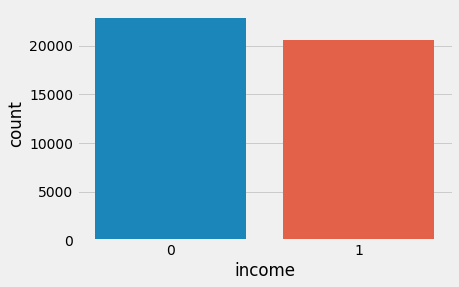

In [62]:
sns.countplot(y_ros)

In [63]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmodel_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6603  281]
 [1785  679]]
******************************
0.7789901583226359
******************************
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6884
           1       0.71      0.28      0.40      2464

    accuracy                           0.78      9348
   macro avg       0.75      0.62      0.63      9348
weighted avg       0.77      0.78      0.74      9348

******************************
CPU times: user 573 ms, sys: 221 ms, total: 793 ms
Wall time: 418 ms


In [64]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6200  684]
 [1678  786]]
******************************
0.7473256311510483
******************************
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6884
           1       0.53      0.32      0.40      2464

    accuracy                           0.75      9348
   macro avg       0.66      0.61      0.62      9348
weighted avg       0.72      0.75      0.72      9348

******************************
CPU times: user 6.32 s, sys: 397 ms, total: 6.72 s
Wall time: 5.21 s


In [65]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5898  986]
 [ 918 1546]]
******************************
0.7963200684638425
******************************
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6884
           1       0.61      0.63      0.62      2464

    accuracy                           0.80      9348
   macro avg       0.74      0.74      0.74      9348
weighted avg       0.80      0.80      0.80      9348

******************************
CPU times: user 294 ms, sys: 884 µs, total: 294 ms
Wall time: 294 ms


In [66]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6255  629]
 [ 917 1547]]
******************************
0.8346170303808301
******************************
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6884
           1       0.71      0.63      0.67      2464

    accuracy                           0.83      9348
   macro avg       0.79      0.77      0.78      9348
weighted avg       0.83      0.83      0.83      9348

******************************
CPU times: user 3.43 s, sys: 20.8 ms, total: 3.45 s
Wall time: 3.45 s


In [73]:
error = []
for i in range(100,2000,100):
    print(i)
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    error.append(np.mean(preds != y_test))

1900


In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(100,2000,100),error,style="--",color = 'black',markersize=10,markerfacecolor='red')

In [76]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_ovr_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6872   12]
 [2099  365]]
******************************
0.7741762943945228
******************************
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6884
           1       0.97      0.15      0.26      2464

    accuracy                           0.77      9348
   macro avg       0.87      0.57      0.56      9348
weighted avg       0.82      0.77      0.71      9348

******************************
CPU times: user 51 s, sys: 196 ms, total: 51.2 s
Wall time: 51.1 s


Only with Scaled Data .

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [79]:
# Scaling the train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmodel_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6296  581]
 [ 952 1519]]
******************************
0.8360077021822849
******************************
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6877
           1       0.72      0.61      0.66      2471

    accuracy                           0.84      9348
   macro avg       0.80      0.77      0.78      9348
weighted avg       0.83      0.84      0.83      9348

******************************
CPU times: user 992 ms, sys: 312 ms, total: 1.3 s
Wall time: 703 ms


In [81]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6100  777]
 [1055 1416]]
******************************
0.8040222507488233
******************************
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6877
           1       0.65      0.57      0.61      2471

    accuracy                           0.80      9348
   macro avg       0.75      0.73      0.74      9348
weighted avg       0.80      0.80      0.80      9348

******************************
CPU times: user 6.51 s, sys: 1.25 s, total: 7.76 s
Wall time: 5.96 s


In [82]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5841 1036]
 [ 886 1585]]
******************************
0.7943945228925974
******************************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6877
           1       0.60      0.64      0.62      2471

    accuracy                           0.79      9348
   macro avg       0.74      0.75      0.74      9348
weighted avg       0.80      0.79      0.80      9348

******************************
CPU times: user 267 ms, sys: 1.02 ms, total: 268 ms
Wall time: 270 ms


In [83]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6262  615]
 [ 916 1555]]
******************************
0.8362216516902011
******************************
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6877
           1       0.72      0.63      0.67      2471

    accuracy                           0.84      9348
   macro avg       0.79      0.77      0.78      9348
weighted avg       0.83      0.84      0.83      9348

******************************
CPU times: user 3.69 s, sys: 431 ms, total: 4.12 s
Wall time: 4.11 s


In [84]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[6319  558]
 [1030 1441]]
******************************
0.8301240907145914
******************************
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6877
           1       0.72      0.58      0.64      2471

    accuracy                           0.83      9348
   macro avg       0.79      0.75      0.77      9348
weighted avg       0.82      0.83      0.82      9348

******************************
CPU times: user 47.3 s, sys: 96.6 ms, total: 47.4 s
Wall time: 47.2 s


Scaling after Resampling.

In [85]:
ros = RandomOverSampler(sampling_strategy=0.9)
X_ros ,y_ros = ros.fit_resample(X,y)

In [86]:
# Splitting the Data
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=43)

In [87]:
# Scaling the train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
%%time
# Logistic Regression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
preds = lrmodel.predict(X_test)
lrmodel_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5553 1332]
 [1090 5030]]
******************************
0.813763936947328
******************************
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      6885
           1       0.79      0.82      0.81      6120

    accuracy                           0.81     13005
   macro avg       0.81      0.81      0.81     13005
weighted avg       0.81      0.81      0.81     13005

******************************
CPU times: user 1.5 s, sys: 424 ms, total: 1.92 s
Wall time: 1.02 s


In [89]:
%%time
#  K Nearest Neighbours classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
knn_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5298 1587]
 [ 977 5143]]
******************************
0.8028450595924644
******************************
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      6885
           1       0.76      0.84      0.80      6120

    accuracy                           0.80     13005
   macro avg       0.80      0.80      0.80     13005
weighted avg       0.81      0.80      0.80     13005

******************************
CPU times: user 12.6 s, sys: 404 ms, total: 13 s
Wall time: 10.1 s


In [90]:
%%time
#  Decision Tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)
tree_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5768 1117]
 [ 395 5725]]
******************************
0.8837370242214533
******************************
              precision    recall  f1-score   support

           0       0.94      0.84      0.88      6885
           1       0.84      0.94      0.88      6120

    accuracy                           0.88     13005
   macro avg       0.89      0.89      0.88     13005
weighted avg       0.89      0.88      0.88     13005

******************************
CPU times: user 384 ms, sys: 1.94 ms, total: 386 ms
Wall time: 388 ms


In [91]:
%%time
#   Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
rfc_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5939  946]
 [ 364 5756]]
******************************
0.8992695117262591
******************************
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6885
           1       0.86      0.94      0.90      6120

    accuracy                           0.90     13005
   macro avg       0.90      0.90      0.90     13005
weighted avg       0.90      0.90      0.90     13005

******************************
CPU times: user 5.53 s, sys: 42.9 ms, total: 5.58 s
Wall time: 5.58 s


In [93]:
%%time
#   Random Forest classifier
svc = SVC()
svc.fit(X_train,y_train)
preds = svc.predict(X_test)
svc_ovr_sca_auc = accuracy_score(y_test,preds)

print(confusion_matrix(y_test,preds))
print(30*"*")

print(accuracy_score(y_test,preds))
print(30*"*")

print(classification_report(y_test,preds))
print(30*"*")

[[5476 1409]
 [ 939 5181]]
******************************
0.8194540561322569
******************************
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      6885
           1       0.79      0.85      0.82      6120

    accuracy                           0.82     13005
   macro avg       0.82      0.82      0.82     13005
weighted avg       0.82      0.82      0.82     13005

******************************
CPU times: user 2min 16s, sys: 190 ms, total: 2min 16s
Wall time: 2min 15s


In [94]:
accu

[0.7789901583226359,
 0.7473256311510483,
 0.8011339323919555,
 0.8332263585793752,
 0.7741762943945228]

In [95]:
sca_scores = [lrmodel_sca_auc,knn_sca_auc,tree_sca_auc,rfc_sca_auc,svc_sca_auc]

In [96]:
ovr_scores = [lrmodel_ovr_auc,knn_ovr_auc,tree_ovr_auc,rfc_ovr_auc,svc_ovr_auc]

In [97]:
sca_ovr_scores = [lrmodel_ovr_sca_auc,knn_ovr_sca_auc,tree_ovr_sca_auc,rfc_ovr_sca_auc,svc_ovr_sca_auc]

In [100]:
models = ["Linear Regression","K Nearest Neighbours","Decision Tree classifier","Random Forest Classifier","Support Vector Classifier"]

In [108]:
scores_df = pd.DataFrame({"Model":models,"Noraml_Auc":accu,"Scaled_Auc":sca_scores,"OverSampled_Auc":ovr_scores,"OverSampled&Scaled_Auc":sca_ovr_scores})

In [109]:
scores_df.set_index(scores_df["Model"],inplace=True)
scores_df.drop("Model",axis=1,inplace=True)

**HyperParameters Optimization**
Since Random Forests gave the Best Results, let's optimize it.

In [110]:
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,6,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 6, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [112]:
random_rf = RandomForestClassifier()

In [120]:
rf_random_grid = RandomizedSearchCV(estimator=random_rf,param_distributions=random_grid,
                                    n_iter=50,cv=3,random_state=100,n_jobs=-1)
rf_random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 6, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100)

In [119]:
rf_random_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 890,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

In [121]:
rf_random_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=890, min_samples_split=4,
                       n_estimators=400)

In [122]:
bestgrid = rf_random_grid.best_estimator_

In [123]:
predict = bestgrid.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.894963475586313
[[5948  906]
 [ 460 5691]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6854
           1       0.86      0.93      0.89      6151

    accuracy                           0.89     13005
   macro avg       0.90      0.90      0.89     13005
weighted avg       0.90      0.89      0.90     13005



With Over Sampling.

In [114]:
ros = RandomOverSampler(sampling_strategy=0.9)
X_ros ,y_ros = ros.fit_resample(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=42)
random_rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=random_rf,param_distributions=random_grid,
                                    n_iter=50,cv=3,random_state=100,n_jobs=-1,verbose=2)
rf_random_grid.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 6, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [115]:
bestgrid = rf_random_grid.best_estimator_

In [116]:
predict = bestgrid.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.897039600153787
[[5949  905]
 [ 434 5717]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      6854
           1       0.86      0.93      0.90      6151

    accuracy                           0.90     13005
   macro avg       0.90      0.90      0.90     13005
weighted avg       0.90      0.90      0.90     13005



In [117]:
### ovr = OverSampled Data
### sca = Normalized Data

In [118]:
scores_df.style.background_gradient(cmap="inferno")

,Noraml_Auc,Scaled_Auc,OverSampled_Auc,OverSampled&Scaled_Auc
Model,,,,
Linear Regression,0.778990,0.836008,0.778990,0.813764
K Nearest Neighbours,0.747326,0.804022,0.747326,0.802845
Decision Tree classifier,0.801134,0.794395,0.796320,0.883737
Random Forest Classifier,0.833226,0.836222,0.834617,0.899270
Support Vector Classifier,0.774176,0.830124,0.774176,0.819454
